Validation of Structure Factor
=======================

In [1]:
import sys
sys.path.insert(1, '../wlcstat/')

In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn
import wlcstat.wlc_lcpoly as wlc_lcpoly
import wlcstat.poly_confine as poly_confine
import wlcstat.active_brown as active_brown
import wlcstat.util.wlc_vertex as vertex
import importlib

In [3]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)
importlib.reload(wlcstruc)
importlib.reload(poly_dyn)
importlib.reload(poly_confine)
importlib.reload(wlc_lcpoly)
importlib.reload(active_brown)

<module 'wlcstat.active_brown' from '/Users/asheshghosh/Downloads/structure_factor/wlcstat/active_brown.py'>

In [4]:
%config InlineBackend.figure_formats = ['svg']

Compare the 2-point structure factor with simulations

In [5]:
n_p = 15
n_b = 200
n_b_calc = 200 
length_kuhn = 10
i_snap_0 = 2000
i_snap_f = 10000

k0 = 1e-2
kf = 1e2
nk = 50
k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)

s2_sim = np.zeros(nk)

for i_snap in range(i_snap_0, i_snap_f + 1):
    u_snap = np.loadtxt('sim_data/u' + str(i_snap))
    r_snap = np.loadtxt('sim_data/r' + str(i_snap))
    for i_p in range(n_p):
        i_0 = n_b * i_p
        i_f = i_0 + n_b_calc
        u_i = u_snap[i_0:i_f, :]
        r_i = r_snap[i_0:i_f, :]
        
        s_mat = np.exp(1j * np.outer(k_vec, r_i[:,0]) / 2)        
        s2_sim += np.abs(np.sum(s_mat, axis = 1)) ** 2 / (n_b_calc ** 2 * (i_snap_f - i_snap_0 + 1) * n_p * 3)
        s_mat = np.exp(1j * np.outer(k_vec, r_i[:,1]) / 2)        
        s2_sim += np.abs(np.sum(s_mat, axis = 1)) ** 2 / (n_b_calc ** 2 * (i_snap_f - i_snap_0 + 1) * n_p * 3)
        s_mat = np.exp(1j * np.outer(k_vec, r_i[:,2]) / 2)        
        s2_sim += np.abs(np.sum(s_mat, axis = 1)) ** 2 / (n_b_calc ** 2 * (i_snap_f - i_snap_0 + 1) * n_p * 3)

In [6]:
def s2_low_k(k1, length_kuhn):
    rg2 = wlcave.rg2_ave(length_kuhn)
            
    s2 = 1 - (1 / 3) * k1 ** 2 *rg2
    
    return s2

In [7]:
length_kuhn = 10.
s2_th = wlcstruc.s2_wlc(k_vec, length_kuhn, alpha_max = 25)

In [8]:
s2_asymp = s2_low_k(k_vec, length_kuhn)

/Users/asheshghosh/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


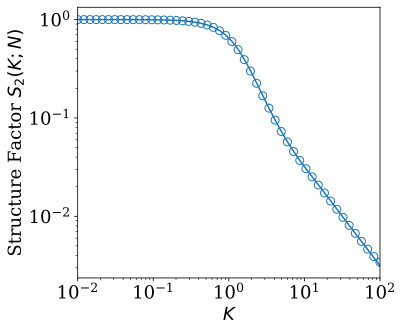

In [30]:
plt.figure(figsize=(6,5))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
    
plt.plot(k_vec, s2_sim, 'o', markersize=8, color='C0',markerfacecolor='none')
plt.plot(k_vec, s2_th,'-')    
#plt.plot(k_vec, s2_asymp,'--')    

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.show()

Compare the 3-point structure factor with simulations

In [25]:
def s3_low_k(k1, k2, length_kuhn):
    rg2 = wlcave.rg2_ave(length_kuhn)
    
#    rg2_cross = length_kuhn / 12 - 1 / 12 + 1 / (8 * length_kuhn ** 2) + (length_kuhn + 1) * np.exp(-2 * length_kuhn) / (8 * length_kuhn ** 3) - 1 / (8 * length_kuhn ** 3)
    rg2_cross = length_kuhn / 6 - 1 / 4 + 1 / (4 * length_kuhn) + np.exp(-2 * length_kuhn) / (8 * length_kuhn ** 2) - 1 / (8 * length_kuhn ** 2)

    
    k1_mag = np.linalg.norm(k1, axis = 1)
    k2_mag = np.linalg.norm(k2, axis = 1)
    
    k1_k2 = k1[:, 0] * k2[:, 0] + k1[:, 1] * k2[:, 1] + k1[:, 2] * k2[:, 2]
    
    s3 = 1 - (1 / 3) * (k1_mag ** 2 + k2_mag ** 2) * rg2 - (1 / 3) * k1_k2 * rg2_cross
    
    return s3

In [26]:
k0 = 1e-2
kf = 1e2
nk = 50
k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)
theta = np.pi * 1 / 2

frac = 1
k2_vec[:, 0] += frac * np.cos(theta) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec = - k1_vec - k2_vec

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

length_kuhn = 10.
s3_th = wlcstruc.s3_wlc(k1_vec, k2_vec, length_kuhn, dimensions = 3, alpha_max = 25)

In [27]:
n_p = 15
n_b = 200
n_b_calc = 200 
length_kuhn = 10
i_snap_0 = 6000
i_snap_f = 10000

s3_sim = np.zeros(nk, dtype = type(1 + 1j))

for i_snap in range(i_snap_0, i_snap_f + 1):
    u_snap = np.loadtxt('sim_data/u' + str(i_snap))
    r_snap = np.loadtxt('sim_data/r' + str(i_snap))
    for i_p in range(n_p):
        i_0 = n_b * i_p
        i_f = i_0 + n_b_calc
        u_i = u_snap[i_0:i_f, :]
        r_i = r_snap[i_0:i_f, :] / 2
        
        s_mat1 = np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        s_mat2 = np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        s_mat3 = np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        

        s3_sim += np.sum(s_mat1, axis = 1) * np.sum(s_mat2, axis = 1) * np.sum(s_mat3, axis = 1) / (n_b_calc ** 3 * (i_snap_f - i_snap_0 + 1) * n_p)

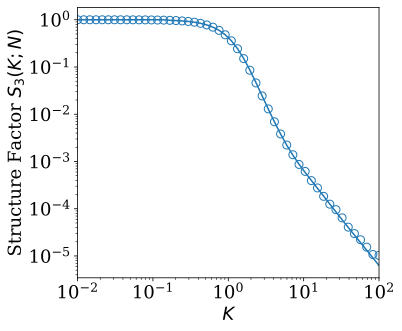

In [31]:
plt.figure(figsize=(6,5))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

s3_asymp = s3_low_k(k1_vec, k2_vec, length_kuhn)
    
plt.plot(k_vec, np.real(s3_sim),'o', markersize=8, color='C0',markerfacecolor='none')
plt.plot(k_vec, np.real(s3_th),'-', color = 'C0')
#plt.plot(k_vec, np.real(s3_asymp),'-', color = 'C1')


plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{3}(K;N)$')
plt.xlim((1e-2, 1e2))
#plt.ylim((1e-8, 1e0))

plt.tight_layout()
plt.show()

Compare the 4-point structure factor with simulations

In [32]:
importlib.reload(wlcstruc)
importlib.reload(vertex)

num_k = 50
k_val_0 = 1e-2
k_val_f = 1e4
dimensions = 3
length_kuhn = 10.

k1_vec = np.zeros((num_k, 3))
k2_vec = np.zeros((num_k, 3))
k3_vec = np.zeros((num_k, 3))

#th = np.arccos(2 * ((np.random.uniform() - 0.5)))
#phi = 2 * np.pi * (np.random.uniform() - 0.5)
th = 0
phi = 0
k1_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k1_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k1_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

th = np.arccos(2 * ((np.random.uniform() - 0.5)))
phi = 2 * np.pi * (np.random.uniform() - 0.5)
#th = np.pi * 109.5 / 180
#phi = 0
k2_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k2_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k2_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

th = np.arccos(2 * ((np.random.uniform() - 0.5)))
phi = 2 * np.pi * (np.random.uniform() - 0.5)
#th = np.pi * 109.5 / 180
#phi = np.pi * 2 / 3
k3_vec[:, 0] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.cos(phi)
k3_vec[:, 1] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.sin(th) * np.sin(phi)
k3_vec[:, 2] = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k) * np.cos(th)

k4_vec = - k1_vec - k2_vec - k3_vec

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

s4 = wlcstruc.s4_wlc(k1_vec, k2_vec, k3_vec, length_kuhn, dimensions, alpha_max = 15)
#s2_1 = wlcstruc.s2_wlc(k1_val, length_kuhn_vec, dimensions, alpha_max = 25)
#s2_2 = wlcstruc.s2_wlc(k2_val, length_kuhn_vec, dimensions, alpha_max = 25)
#s2_3 = wlcstruc.s2_wlc(k3_val, length_kuhn_vec, dimensions, alpha_max = 25)

In [33]:
n_p = 15
n_b = 200
n_b_calc = 200 
length_kuhn = 10
i_snap_0 = 6000
i_snap_f = 10000

s4_sim = np.zeros(num_k, dtype = type(1 + 1j))

for i_snap in range(i_snap_0, i_snap_f + 1):
    u_snap = np.loadtxt('sim_data/u' + str(i_snap))
    r_snap = np.loadtxt('sim_data/r' + str(i_snap))
    for i_p in range(n_p):
        i_0 = n_b * i_p
        i_f = i_0 + n_b_calc
        u_i = u_snap[i_0:i_f, :]
        r_i = r_snap[i_0:i_f, :] / 2
        
        s_mat1 = np.exp(1j * (np.outer(k1_vec[:, 0], r_i[:, 0]) + np.outer(k1_vec[:, 1], r_i[:, 1]) + np.outer(k1_vec[:, 2], r_i[:, 2])))        
        s_mat2 = np.exp(1j * (np.outer(k2_vec[:, 0], r_i[:, 0]) + np.outer(k2_vec[:, 1], r_i[:, 1]) + np.outer(k2_vec[:, 2], r_i[:, 2])))        
        s_mat3 = np.exp(1j * (np.outer(k3_vec[:, 0], r_i[:, 0]) + np.outer(k3_vec[:, 1], r_i[:, 1]) + np.outer(k3_vec[:, 2], r_i[:, 2])))        
        s_mat4 = np.exp(1j * (np.outer(k4_vec[:, 0], r_i[:, 0]) + np.outer(k4_vec[:, 1], r_i[:, 1]) + np.outer(k4_vec[:, 2], r_i[:, 2])))        

        s4_sim += np.sum(s_mat1, axis = 1) * np.sum(s_mat2, axis = 1) * np.sum(s_mat3, axis = 1) * np.sum(s_mat4, axis = 1) / (n_b_calc ** 4 * (i_snap_f - i_snap_0 + 1) * n_p)

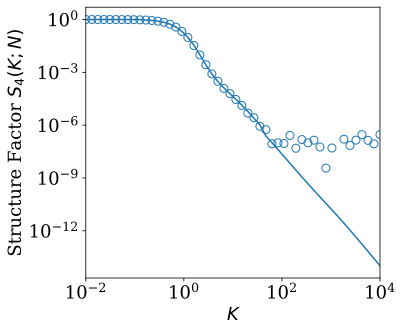

In [34]:
plt.figure(figsize=(6,5))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(k1_val, (np.real(s4_sim)),'o', markersize=8, color='C0',markerfacecolor='none')
plt.plot(k1_val, (np.real(s4)),'-', color = 'C0')
#plt.plot(k1_val, np.real(s4),'-', color = 'C0')
#plt.plot(k1_val, length_kuhn * k1_val ** (-1),'-', color = 'C0')
#plt.plot(k_vec, np.real(s3_asymp),'-', color = 'C1')


plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{4}(K;N)$')
plt.xlim((1e-2, 1e4))
#plt.ylim((1e-8, 1e0))

plt.tight_layout()
plt.show()